In [1]:

import pandas as pd
import numpy as np
data = pd.read_csv('neurokit.csv', sep=';')
features = data.drop(['Label','ID'], axis=1)
target = data['Label']
from sklearn.model_selection import train_test_split


features = features.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(
    features, target,test_size=0.20,random_state=42,stratify=target)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X= X_test

from sklearn import preprocessing
scaler = preprocessing.StandardScaler() 
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.svm import SVC
model = SVC(random_state=42)
parameters = {'kernel': ('linear', 'rbf'), 'C': [0.1 , 1, 10], 'gamma': [0.1, 1, 10]}

from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, param_grid=parameters, scoring='accuracy', n_jobs=1, cv=cv, refit=True)




(61, 79) (16, 79) (61,) (16,)


In [2]:
%%time
clf.fit(X_train, y_train)

CPU times: user 278 ms, sys: 60.1 ms, total: 338 ms
Wall time: 342 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [3]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf.best_estimator_, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Presnosť tréningových dát: %0.2f' % (scores.max() * 100))
y_pred = clf.best_estimator_.predict(X_test)
from sklearn.metrics import accuracy_score
print('Presnosť klasifikácie dát: %0.2f' % (accuracy_score(y_test,y_pred) * 100))


Presnosť tréningových dát: 100.00
Presnosť klasifikácie dát: 31.25


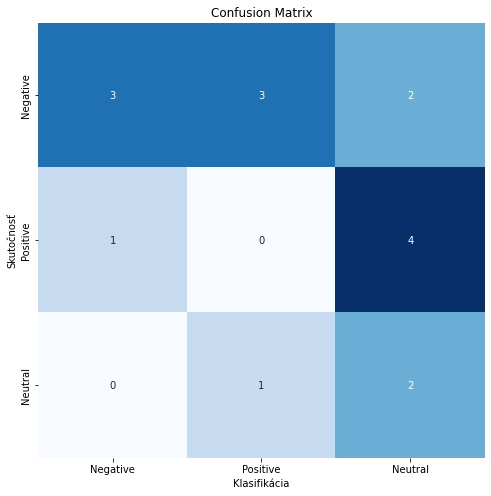

Classification Report:
----------------------
               precision    recall  f1-score   support

    Negative       0.75      0.38      0.50         8
    Positive       0.00      0.00      0.00         5
     Neutral       0.25      0.67      0.36         3

    accuracy                           0.31        16
   macro avg       0.33      0.35      0.29        16
weighted avg       0.42      0.31      0.32        16



In [4]:
from sklearn.metrics import confusion_matrix,  classification_report
import seaborn as sns
import matplotlib.pyplot as plt
mapovanie = {'Negative': 0, 'Positive': 1, 'Neutral': 2}
#y_pred = np.array(list(map(lambda x: np.argmax(x), clf.predict(X_test_scaled))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=mapovanie.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, mapovanie.keys())
plt.yticks(np.arange(3) + 0.5, mapovanie.keys())
plt.xlabel("Klasifikácia")
plt.ylabel("Skutočnosť")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)